In [3]:
import nltk
from nltk import Text, sent_tokenize, word_tokenize, RegexpTokenizer

In [156]:
import pandas as pd

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
sleep = open('/home/amn34/metis/stuff/noirs/chandler/39_rc_bigsleep.txt').read()

sleep = sleep.decode('utf-8', 'ignore')

sleep = sleep.lower()

tokenizer = RegexpTokenizer(r'\w+')

sleepwordsorig = tokenizer.tokenize(sleep)

from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.append('said')

sleepstop = [w for w in sleepwordsorig if not w in stop]

print len(sleepstop)/float(len(sleepwordsorig))

print 'proportional number of stopwords pages:', 277*31642/68703

sent = pd.read_pickle('sentiment.pkl')

#sent.fillna(0, inplace=True)

#sent.sentiment.replace({'negative':-1,'positive':1}, inplace=True)

#sent['word'] = sent['word'].values.astype('unicode')

#sent.to_pickle('sentiment.pkl')

sleepwords = pd.DataFrame(columns=['word'])

sleepwords.word = sleepstop

sleepsentiment = pd.merge(sleepwords, sent, how='left', on='word')

sleepsentiment.head()

In [158]:
sleepsentiment.fillna(0, inplace=True)

In [157]:
len(sleepstop)/127.0

249.1496062992126

In [26]:
import numpy as np

In [27]:
sleepsentiment.fillna(0,inplace=True)

In [28]:
sample = sleepsentiment[0:1000]

In [29]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in xrange(0, len(seq), size))

In [30]:
pagesent = []

for i in chunker(sleepsentiment,150):
    pagesent.append(sum(i.sentiment))

In [31]:
len(pagesent)

211

<Container object of 211 artists>

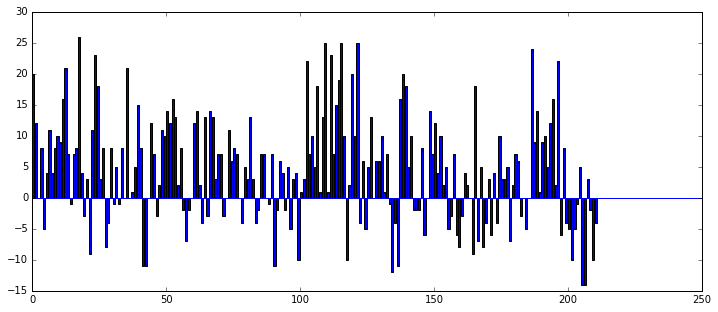

In [32]:
plt.figure(figsize=(12,5))
plt.axhline(y=0)
plt.bar(range(len(pagesent)),pagesent)

In [33]:
words = word_tokenize(sleep)

In [34]:
sentences = sent_tokenize(sleep)

In [35]:
print len(sentences), len(words), len(words)/float(len(sentences))

6591 81341 12.3412228797


In [36]:
ss = sleepsentiment.sentiment.values

In [37]:
from collections import Counter

In [38]:
Counter(ss)

Counter({-1.0: 3828, 0.0: 23048, 1.0: 4766})

In [39]:
pospage = []
negpage = []

for i in chunker(sleepsentiment,150):
    postemp = 0
    negtemp = 0
    for j in i.sentiment.values:
        if j == 1.0:
            postemp += 1
        elif j == -1.0:
            negtemp -= 1
    pospage.append(postemp)
    negpage.append(negtemp)

In [40]:
len(pospage)

211

<Container object of 211 artists>

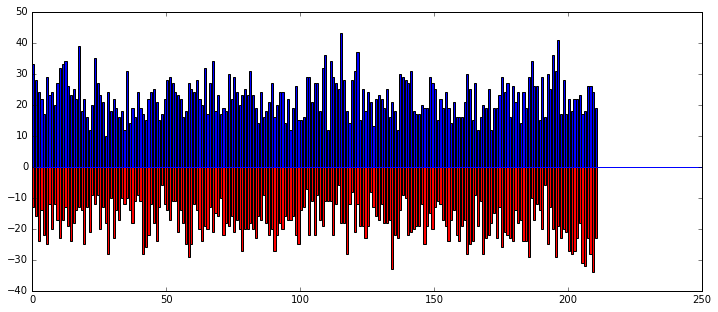

In [41]:
plt.figure(figsize=(12,5))
plt.axhline(y=0)
plt.bar(range(len(pospage)),pospage)
plt.bar(range(len(negpage)), negpage, color='r')

In [42]:
pagesent = map(int,pagesent)

In [43]:
len(pagesent)

211

In [44]:
import scipy.fftpack

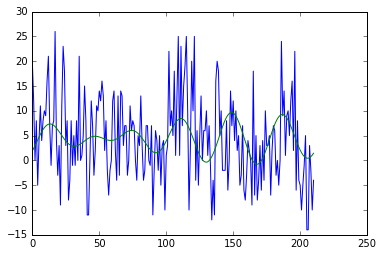

In [172]:
cN = 211
cx = np.linspace(0,2*np.pi,cN)
cy = np.asarray(pagesent)

cw = scipy.fftpack.rfft(cy)
cf = scipy.fftpack.rfftfreq(cN, cx[1]-cx[0])
cspectrum = cw**2

ccutoff_idx = cspectrum < (cspectrum.max()/13)
cw2 = cw.copy()
cw2[ccutoff_idx] = 0

cy2 = scipy.fftpack.irfft(cw2)
plt.plot(x,y)
plt.plot(x,cy2)

In [50]:
woman = [u'she',u'her',u'girl']
womancount = []
for i in chunker(sleepwordsorig,250):
    womantmp = 0
    for word in i:
        if word in woman:
            womantmp+=1
    womancount.append(womantmp)

<Container object of 275 artists>

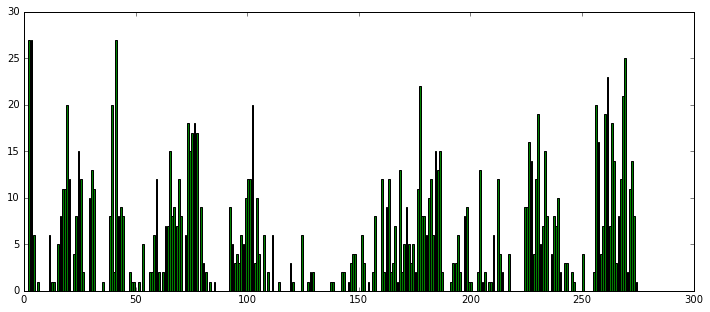

In [51]:
plt.figure(figsize=(12,5))
plt.bar(range(len(womancount)),womancount,color='g')

In [52]:
guncount = []
gun = ['gun','guns']
for i in chunker(sleepwordsorig,250):
    guntmp = 0
    for word in i:
        if word in gun:
            guntmp+=1
    guncount.append(guntmp)

<Container object of 275 artists>

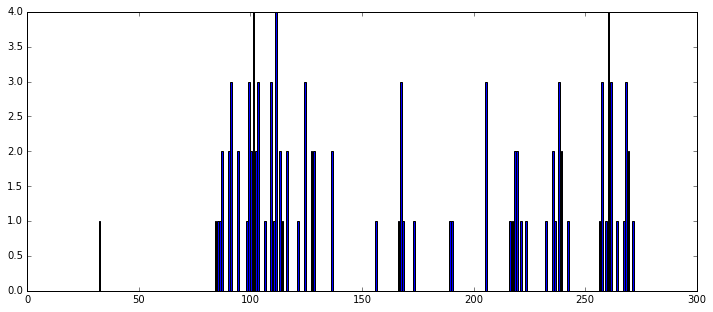

In [53]:
plt.figure(figsize=(12,5))
plt.axhline(y=0)
plt.bar(range(len(guncount)),guncount)